# **Essiential Imports**

In [ ]:
import warnings
warnings.simplefilter("ignore")

import re
import numpy as np 
import pandas as pd
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('seaborn')

import gensim  # https://pypi.org/project/gensim/
import nltk #https://www.nltk.org/
from nltk.sentiment import SentimentIntensityAnalyzer #https://www.nltk.org/api/nltk.sentiment.html
from textblob import TextBlob #https://textblob.readthedocs.io/en/dev/
from wordcloud import WordCloud, STOPWORDS #https://pypi.org/project/wordcloud/

from nltk.stem import WordNetLemmatizer
from nltk.stem import LancasterStemmer
from nltk.tokenize.treebank import TreebankWordDetokenizer

import tensorflow as tf
import plotly.express as px

In [ ]:
from nltk.corpus import stopwords
from nltk.corpus import wordnet
from nltk.stem import WordNetLemmatizer
from nltk.stem import LancasterStemmer
from nltk.tokenize.treebank import TreebankWordDetokenizer
from collections import Counter
from wordcloud import WordCloud
from nltk.corpus import stopwords
from gensim.utils import simple_preprocess
from nltk.corpus import stopwords
import gensim
from sklearn.model_selection import train_test_split
import spacy
import pickle
from keras.preprocessing.text import Tokenizer
#for confusion matrix
import seaborn
from sklearn.metrics import confusion_matrix
import keras

# **Data Access**

In [ ]:
from google.colab import drive
drive.mount("/content/drive")
root = "/content/drive/My Drive/Masters/Deep learning/DL Project/Sentiment Analysis of COVID-19 Vaccination from Twitter/Datasets/"

Mounted at /content/drive


# **Import, Explore and Analyze Data**

In [ ]:
#dataset_path = "/content/all-covid19-vaccines-tweets/vaccination_all_tweets.csv"
tweets_df = pd.read_csv(root+'Original_labeled_by_BERT.csv')
#tweets_df = pd.read_csv(dataset_path)

In [ ]:
tweets_df.head(10)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,tf-sentiment
0,1.340540e+18,Rachel Roh,"La Crescenta-Montrose, CA",Aggregator of Asian American news; scanning di...,4/8/2009 17:52,405,1692,3247,False,12/20/2020 6:06,Same folks said daikon paste could treat a cyt...,['PfizerBioNTech'],Twitter for Android,0,0,False,neutral
1,1.338160e+18,Albert Fong,"San Francisco, CA","Marketing dude, tech geek, heavy metal & '80s ...",9/21/2009 15:27,834,666,178,False,12/13/2020 16:27,While the world has been on the wrong side of ...,NaN,Twitter Web App,1,1,False,neutral
2,1.337860e+18,eli🇱🇹🇪🇺👌,Your Bed,"heil, hydra 🖐☺",6/25/2020 23:30,10,88,155,False,12/12/2020 20:33,#coronavirus #SputnikV #AstraZeneca #PfizerBio...,"['coronavirus', 'SputnikV', 'AstraZeneca', 'Pf...",Twitter for Android,0,0,False,neutral
3,1.337860e+18,Charles Adler,"Vancouver, BC - Canada","Hosting ""CharlesAdlerTonight"" Global News Radi...",9/10/2008 11:28,49165,3933,21853,True,12/12/2020 20:23,"Facts are immutable, Senator, even when you're...",NaN,Twitter Web App,446,2129,False,neutral
4,1.337850e+18,Citizen News Channel,NaN,Citizen News Channel bringing you an alternati...,4/23/2020 17:58,152,580,1473,False,12/12/2020 20:17,Explain to me again why we need a vaccine @Bor...,"['whereareallthesickpeople', 'PfizerBioNTech']",Twitter for iPhone,0,0,False,negative
5,1.337850e+18,Dee,"Birmingham, England","Gastroenterology trainee, Clinical Research Fe...",1/26/2020 21:43,105,108,106,False,12/12/2020 20:11,Does anyone have any useful advice/guidance fo...,NaN,Twitter for iPhone,0,0,False,neutral
6,1.337850e+18,Gunther Fehlinger,"Austria, Ukraine and Kosovo",End North Stream 2 now - the pipeline of corru...,6/10/2013 17:49,2731,5001,69344,False,12/12/2020 20:06,it is a bit sad to claim the fame for success ...,['vaccination'],Twitter Web App,0,4,False,negative
7,1.337850e+18,Dr.Krutika Kuppalli,NaN,"ID, Global Health, VHF, Pandemic Prep, Emergin...",3/25/2019 4:14,21924,593,7815,True,12/12/2020 20:04,There have not been many bright days in 2020 b...,"['BidenHarris', 'Election2020']",Twitter for iPhone,2,22,False,positive
8,1.337850e+18,Erin Despas,NaN,Designing&selling on Teespring. Like 90s Disne...,10/30/2009 17:53,887,1515,9639,False,12/12/2020 20:01,Covid vaccine; You getting it?\n\n #CovidVacci...,"['CovidVaccine', 'covid19', 'PfizerBioNTech', ...",Twitter Web App,2,1,False,neutral
9,1.337840e+18,Ch.Amjad Ali,Islamabad,#ProudPakistani #LovePakArmy #PMIK @insafiansp...,11/12/2012 4:18,671,2368,20469,False,12/12/2020 19:30,#CovidVaccine \n\nStates will start getting #C...,"['CovidVaccine', 'COVID19Vaccine', 'US', 'paku...",Twitter Web App,0,0,False,neutral


In [ ]:
print(f'The Dataset shape is:',tweets_df.shape)

The Dataset shape is: (56585, 17)


In [ ]:
tweets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56585 entries, 0 to 56584
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                56585 non-null  float64
 1   user_name         56585 non-null  object 
 2   user_location     43499 non-null  object 
 3   user_description  52698 non-null  object 
 4   user_created      56585 non-null  object 
 5   user_followers    56585 non-null  int64  
 6   user_friends      56585 non-null  int64  
 7   user_favourites   56585 non-null  int64  
 8   user_verified     56585 non-null  bool   
 9   date              56585 non-null  object 
 10  text              56585 non-null  object 
 11  hashtags          44347 non-null  object 
 12  source            56460 non-null  object 
 13  retweets          56585 non-null  int64  
 14  favorites         56585 non-null  int64  
 15  is_retweet        56585 non-null  bool   
 16  tf-sentiment      56585 non-null  object

In [ ]:
tweets_df.describe()

,id,user_followers,user_friends,user_favourites,retweets,favorites
count,5.658500e+04,5.658500e+04,56585.000000,5.658500e+04,56585.000000,56585.000000
mean,1.369533e+18,1.007127e+05,1306.046037,1.568134e+04,3.089547,13.585827
std,9.728595e+15,8.379072e+05,6017.296036,4.371546e+04,51.458322,200.297695
min,1.337730e+18,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,1.365250e+18,1.150000e+02,145.000000,3.630000e+02,0.000000,0.000000
50%,1.371340e+18,5.510000e+02,413.000000,2.222000e+03,0.000000,1.000000
75%,1.377260e+18,2.565000e+03,1197.000000,1.156500e+04,1.000000,3.000000
max,1.381860e+18,1.497539e+07,516808.000000,1.220826e+06,7695.000000,22815.000000


**Missing Data**

In [ ]:
#Lets find out the mising data
def missing_data(data):
    total = data.isnull().sum()
    percent = (data.isnull().sum()/data.isnull().count()*100)
    tt = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    
    types = []
    for col in data.columns:
        dtype = str(data[col].dtype)
        types.append(dtype)
    tt['Types'] = types
    return(np.transpose(tt))

In [ ]:
missing_data(tweets_df)

,id,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,retweets,favorites,is_retweet,tf-sentiment
Total,0,0,13086,3887,0,0,0,0,0,0,0,12238,125,0,0,0,0
Percent,0.0,0.0,23.12627,6.869312,0.0,0.0,0.0,0.0,0.0,0.0,0.0,21.62764,0.220907,0.0,0.0,0.0,0.0
Types,float64,object,object,object,object,int64,int64,int64,bool,object,object,object,object,int64,int64,bool,object


In [ ]:
tweets_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56585 entries, 0 to 56584
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                56585 non-null  float64
 1   user_name         56585 non-null  object 
 2   user_location     43499 non-null  object 
 3   user_description  52698 non-null  object 
 4   user_created      56585 non-null  object 
 5   user_followers    56585 non-null  int64  
 6   user_friends      56585 non-null  int64  
 7   user_favourites   56585 non-null  int64  
 8   user_verified     56585 non-null  bool   
 9   date              56585 non-null  object 
 10  text              56585 non-null  object 
 11  hashtags          44347 non-null  object 
 12  source            56460 non-null  object 
 13  retweets          56585 non-null  int64  
 14  favorites         56585 non-null  int64  
 15  is_retweet        56585 non-null  bool   
 16  tf-sentiment      56585 non-null  object

In [ ]:
# I could have dropped null holding rows but till this point I am only concerned 
# about the text it self so it would be a loss to drop rows containing text because of nonused columns

tweets_df.isnull().sum()

id                      0
user_name               0
user_location       13086
user_description     3887
user_created            0
user_followers          0
user_friends            0
user_favourites         0
user_verified           0
date                    0
text                    0
hashtags            12238
source                125
retweets                0
favorites               0
is_retweet              0
tf-sentiment            0
dtype: int64

# **Data Pre-Processing**

In [ ]:
'''
The next steps about data cleaning will be:
- Remove URLs from the tweets
- Tokenize text
- Remove emails
- Remove new lines characters
- Remove distracting single quotes
- Remove all punctuation signs
- Lowercase all text
- Detokenize text
- Convert list of texts to Numpy array
'''
def depure_data(data):
    
    #Removing URLs with a regular expression
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    data = url_pattern.sub(r'', data)

    # Remove Emails
    data = re.sub('\S*@\S*\s?', '', data)

    # Remove new line characters
    data = re.sub('\s+', ' ', data)

    # Remove distracting single quotes
    data = re.sub("\'", "", data)
        
    return data

In [ ]:
temp = []
#Splitting pd.Series to list
data_to_list = tweets_df["text"].values.tolist()
for i in range(len(data_to_list)):
    temp.append(depure_data(data_to_list[i]))
list(temp[:5])

['Same folks said daikon paste could treat a cytokine storm #PfizerBioNTech ',
 'While the world has been on the wrong side of history this year, hopefully, the biggest vaccination effort weve ev… ',
 '#coronavirus #SputnikV #AstraZeneca #PfizerBioNTech #Moderna #Covid_19 Russian vaccine is created to last 2-4 years… ',
 'Facts are immutable, Senator, even when youre not ethically sturdy enough to acknowledge them. (1) You were born i… ',
 'Explain to me again why we need a vaccine #whereareallthesickpeople #PfizerBioNTech… ']

In [ ]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))
        

data_words = list(sent_to_words(temp))
print(data_words[:10],'\n')

[['same', 'folks', 'said', 'daikon', 'paste', 'could', 'treat', 'cytokine', 'storm', 'pfizerbiontech'], ['while', 'the', 'world', 'has', 'been', 'on', 'the', 'wrong', 'side', 'of', 'history', 'this', 'year', 'hopefully', 'the', 'biggest', 'vaccination', 'effort', 'weve', 'ev'], ['coronavirus', 'sputnikv', 'astrazeneca', 'pfizerbiontech', 'moderna', 'covid_', 'russian', 'vaccine', 'is', 'created', 'to', 'last', 'years'], ['facts', 'are', 'immutable', 'senator', 'even', 'when', 'youre', 'not', 'ethically', 'sturdy', 'enough', 'to', 'acknowledge', 'them', 'you', 'were', 'born'], ['explain', 'to', 'me', 'again', 'why', 'we', 'need', 'vaccine', 'pfizerbiontech'], ['does', 'anyone', 'have', 'any', 'useful', 'advice', 'guidance', 'for', 'whether', 'the', 'covid', 'vaccine', 'is', 'safe', 'whilst', 'breastfeeding'], ['it', 'is', 'bit', 'sad', 'to', 'claim', 'the', 'fame', 'for', 'success', 'of', 'vaccination', 'on', 'patriotic', 'competition', 'between', 'usa', 'canada', 'uk', 'and'], ['there'

In [ ]:
def detokenize(text):
    return TreebankWordDetokenizer().detokenize(text)

data = []
for i in range(len(data_words)):
    data.append(detokenize(data_words[i]))
print(data[:5])

['same folks said daikon paste could treat cytokine storm pfizerbiontech', 'while the world has been on the wrong side of history this year hopefully the biggest vaccination effort weve ev', 'coronavirus sputnikv astrazeneca pfizerbiontech moderna covid_ russian vaccine is created to last years', 'facts are immutable senator even when youre not ethically sturdy enough to acknowledge them you were born', 'explain to me again why we need vaccine pfizerbiontech']


In [ ]:
data = np.array(data)
#Create a sentiment column
#tweets_df["sentiment"] = np.nan

In [ ]:
def plot_sentiment(df, feature, title):
    counts = df[feature].value_counts()
    percent = counts/sum(counts)

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    counts.plot(kind='bar', ax=ax1, color='green')
    percent.plot(kind='bar', ax=ax2, color='blue')
    ax1.set_ylabel(f'Counts : {title} sentiments', size=12)
    ax2.set_ylabel(f'Percentage : {title} sentiments', size=12)
    plt.suptitle(f"Sentiment analysis: {title}\n")  
    plt.tight_layout()
    plt.show()

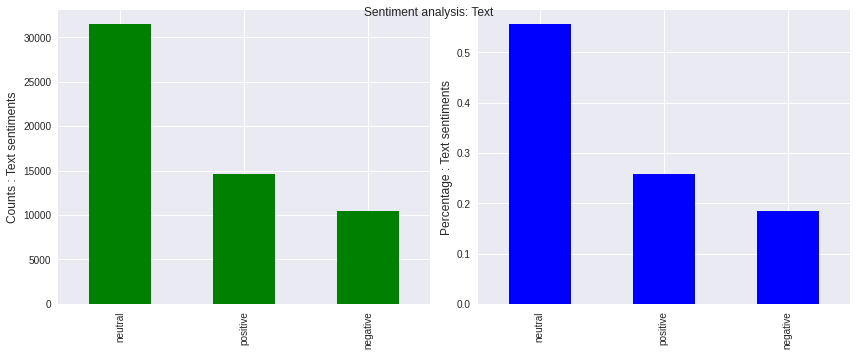

In [ ]:
plot_sentiment(tweets_df, 'tf-sentiment', 'Text')

In [ ]:
# Label Encoding
labels = np.array(tweets_df["tf-sentiment"])
y = []
for i in range(len(labels)):
    if labels[i] == 'neutral':
        y.append(0)
    if labels[i] == 'positive':
        y.append(1)
    if labels[i] == 'negative':
        y.append(2)
y = np.array(y)
labels = tf.keras.utils.to_categorical(y, 3, dtype="float32")
del y

In [ ]:
labels

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 1., 0.],
       [0., 1., 0.],
       [0., 1., 0.]], dtype=float32)

In [ ]:
from keras.models import Sequential
from keras import layers
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.text import Tokenizer
#from keras.preprocessing.sequence import pad_sequences
from keras_preprocessing.sequence import pad_sequences
from keras import regularizers
from keras import backend as K
from keras.callbacks import ModelCheckpoint

In [ ]:
# #Conver the word to vec
max_words = 5000
max_len = 200
tokenizer = Tokenizer(num_words=max_words)
tokenizer.fit_on_texts(data)
sequences = tokenizer.texts_to_sequences(data)
tweets = pad_sequences(sequences, maxlen=max_len)
print(tweets)

[[   0    0    0 ... 2259 4274   24]
 [   0    0    0 ... 1559 1791 3647]
 [   0    0    0 ...    4  200  347]
 ...
 [   0    0    0 ...    3   14 1647]
 [   0    0    0 ...  124  155   29]
 [   0    0    0 ...   40  349  192]]


In [ ]:
print(labels)

[[1. 0. 0.]
 [1. 0. 0.]
 [1. 0. 0.]
 ...
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 1. 0.]]


In [ ]:
#Splitting the data
X_train, X_test, y_train, y_test = train_test_split(tweets,labels, random_state=0)
print (f"Our data split form:\n")
print(f"X_train: ",len(X_train))
print(f"X_test: ",len(X_test))
print(f"y_train: ",len(y_train))
print(f"y_test: ", len(y_test))

Our data split form:

X_train:  42438
X_test:  14147
y_train:  42438
y_test:  14147


# **Fine Tuned Pretrained BERT Model**

In [ ]:
tweets_df["label"] = np.nan

In [ ]:
tweets_df["label"] = tweets_df["tf-sentiment"].replace({'neutral':0})
tweets_df["label"] = tweets_df["label"].replace({'positive':1})
tweets_df["label"] = tweets_df["label"].replace({'negative':2})

In [ ]:
tweets_df["label"]

0        0
1        0
2        0
3        0
4        2
        ..
56580    0
56581    2
56582    1
56583    1
56584    1
Name: label, Length: 56585, dtype: int64

In [ ]:
df_train, df_test = train_test_split(tweets_df, test_size=0.1, random_state=42)
df_val, df_test = train_test_split(df_test, test_size=0.5, random_state=42)

In [ ]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50926 entries, 13643 to 56422
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                50926 non-null  float64
 1   user_name         50926 non-null  object 
 2   user_location     39151 non-null  object 
 3   user_description  47427 non-null  object 
 4   user_created      50926 non-null  object 
 5   user_followers    50926 non-null  int64  
 6   user_friends      50926 non-null  int64  
 7   user_favourites   50926 non-null  int64  
 8   user_verified     50926 non-null  bool   
 9   date              50926 non-null  object 
 10  text              50926 non-null  object 
 11  hashtags          39867 non-null  object 
 12  source            50810 non-null  object 
 13  retweets          50926 non-null  int64  
 14  favorites         50926 non-null  int64  
 15  is_retweet        50926 non-null  bool   
 16  tf-sentiment      50926 non-null  ob

In [ ]:
!pip install -qq transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 82.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 190.3/190.3 KB 23.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 113.2 MB/s eta 0:00:00


In [ ]:
#Setup & Config
import transformers
from transformers import BertModel, BertTokenizer, AdamW, get_linear_schedule_with_warmup
import torch
import numpy as np
import pandas as pd
import seaborn as sns
from pylab import rcParams
import matplotlib.pyplot as plt
from matplotlib import rc
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from collections import defaultdict
from textwrap import wrap

from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
import torch.nn.functional as F

%matplotlib inline
%config InlineBackend.figure_format='retina'

sns.set(style='whitegrid', palette='muted', font_scale=1.2)

HAPPY_COLORS_PALETTE = ["#01BEFE", "#FFDD00", "#FF7D00", "#FF006D", "#ADFF02", "#8F00FF"]

sns.set_palette(sns.color_palette(HAPPY_COLORS_PALETTE))

rcParams['figure.figsize'] = 12, 8

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
torch.manual_seed(RANDOM_SEED)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
device

device(type='cuda', index=0)

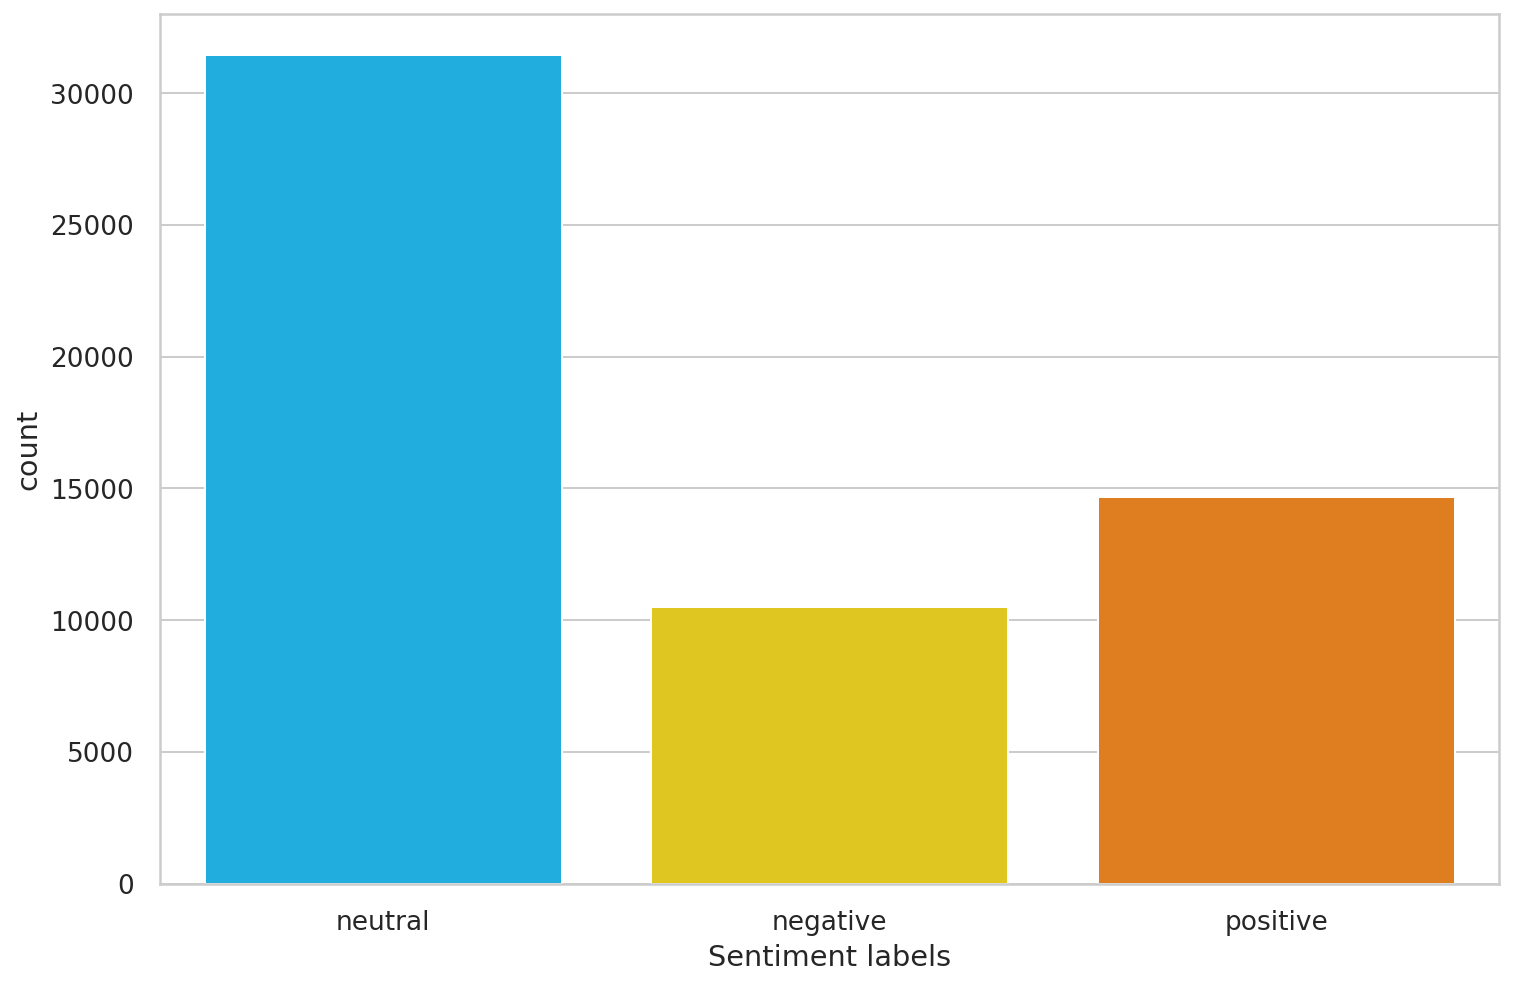

In [ ]:
sns.countplot(tweets_df["tf-sentiment"])
plt.xlabel('Sentiment labels');

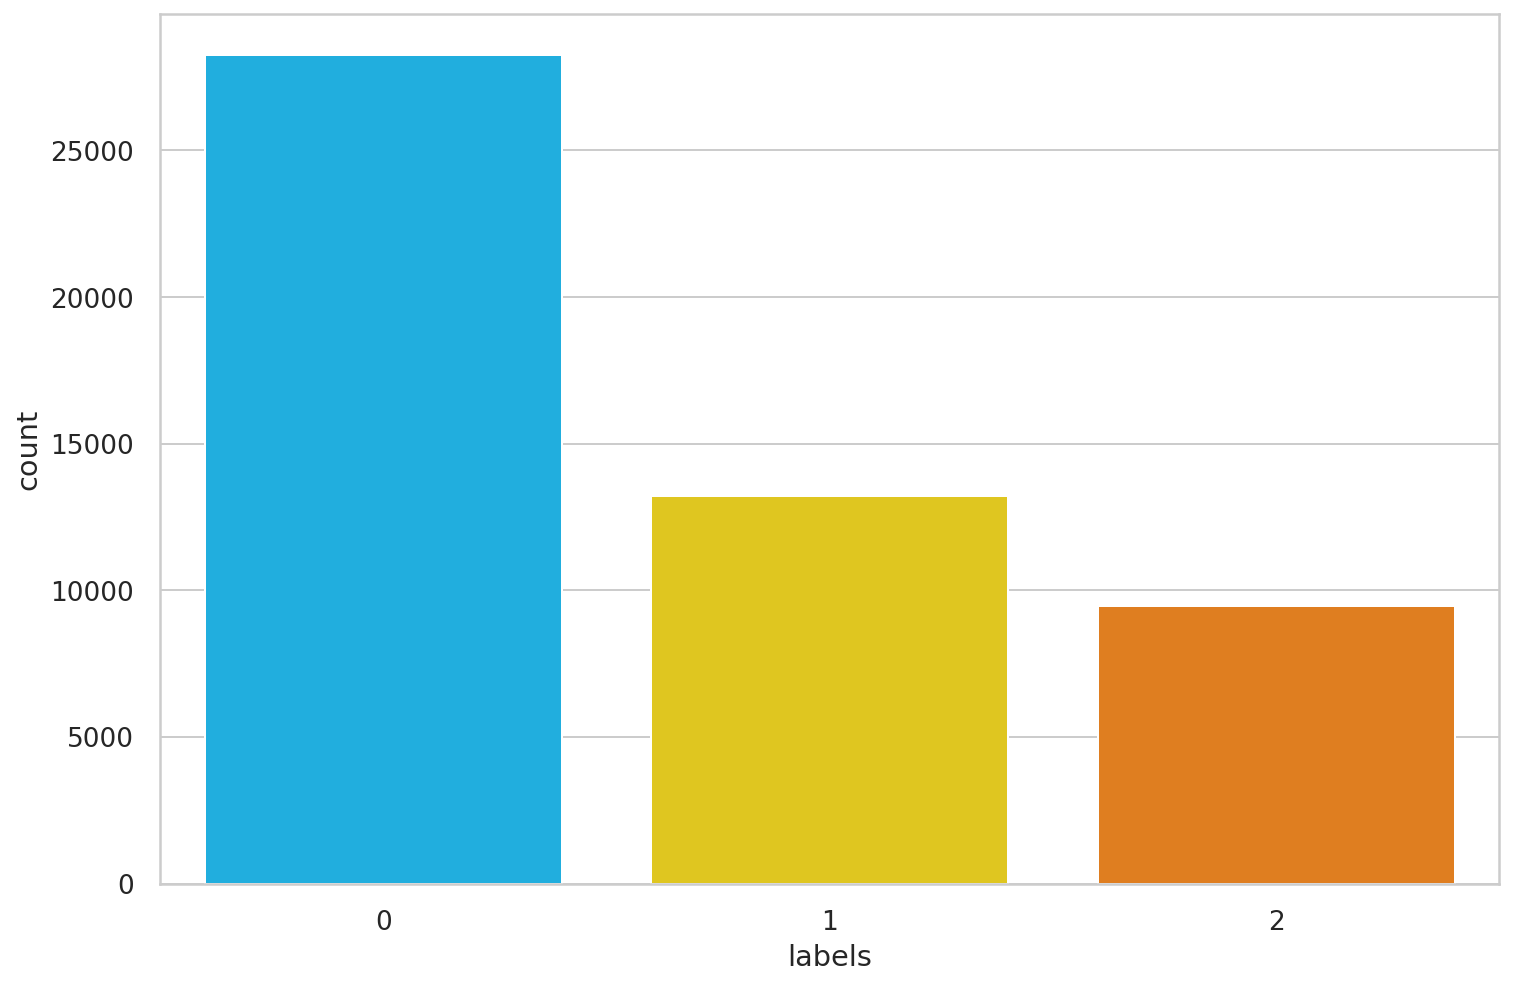

In [ ]:
sns.countplot(df_train.label)
plt.xlabel('labels');

In [ ]:
class_names = ['neutral','positive','negative']

In [ ]:
PRE_TRAINED_MODEL_NAME = 'bert-base-cased'

In [ ]:
tokenizer = BertTokenizer.from_pretrained(PRE_TRAINED_MODEL_NAME)

In [ ]:
df_train.text.head(10)

13643    @pbhushan1 @mandeeppunia1 @BrutIndia @TheDeshB...
31240    #Moderna for the win /dose 1 of two https://t....
5371     The companies’ global delivery targets for 202...
22035    🇪🇺🇷🇺💉 Europe's drug regulator has launched an ...
31956    My #vaccination adventure, in reverse order. #...
30801    ‘First donate blood, then go for #covidvacccin...
33510    1 of 2. #vaccine #OxfordAstraZeneca wish they’...
41044    Next Brazil of world Maharashtra of India. No ...
913      from excited, to feeling dizzy then to 💀⁉️\nIs...
19819    @FaheemYounus \nIs #sinopharm vaccine good for...
Name: text, dtype: object

In [ ]:
token_lens = []

for txt in df_train.text:
  tokens = tokenizer.encode(txt, max_length=512)
  token_lens.append(len(tokens))

Truncation was not explicitly activated but `max_length` is provided a specific value, please use `truncation=True` to explicitly truncate examples to max length. Defaulting to 'longest_first' truncation strategy. If you encode pairs of sequences (GLUE-style) with the tokenizer you can select this strategy more precisely by providing a specific strategy to `truncation`.


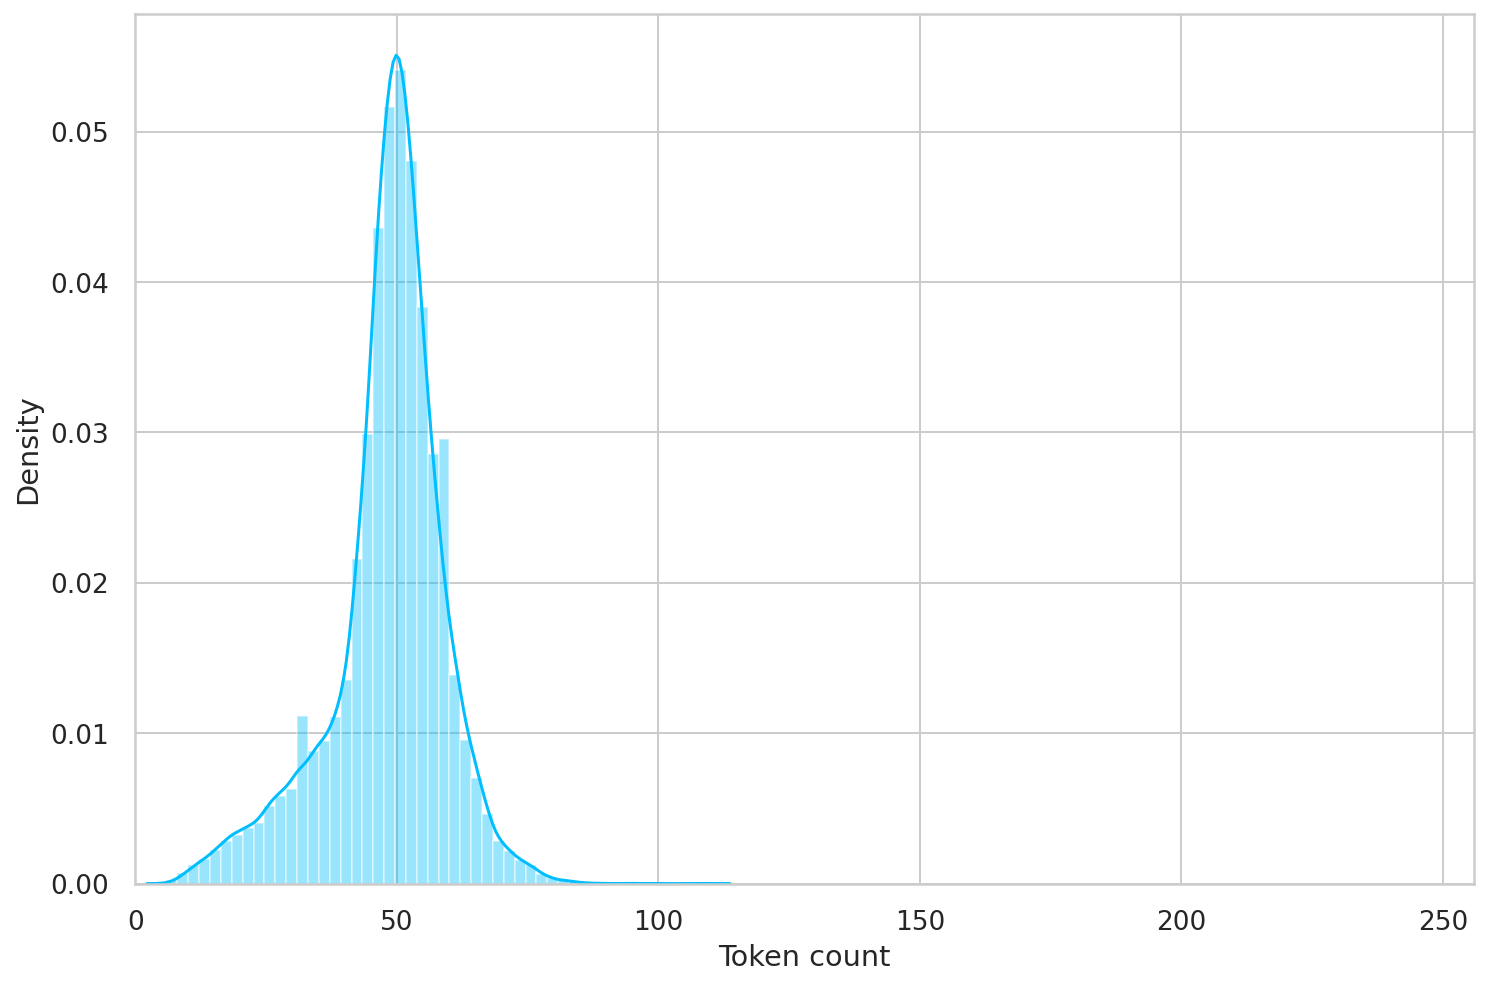

In [ ]:
sns.distplot(token_lens)
plt.xlim([0, 256]);
plt.xlabel('Token count');

In [ ]:
MAX_LEN = 130

In [ ]:
class SentimentDataset(Dataset):

  def __init__(self, text, targets, tokenizer, max_len):
    self.text = text
    self.targets = targets
    self.tokenizer = tokenizer
    self.max_len = max_len
  
  def __len__(self):
    return len(self.text)
  
  def __getitem__(self, item):
    text = str(self.text[item])
    target = self.targets[item]

    encoding = self.tokenizer.encode_plus(
      text,
      pad_to_max_length=True,
      max_length=self.max_len,
      add_special_tokens=True,
      return_token_type_ids=False,
      return_attention_mask=True,
      return_tensors='pt',
    )

    return {
      'text': text,
      'input_ids': encoding['input_ids'].flatten(),
      'attention_mask': encoding['attention_mask'].flatten(),
      'targets': torch.tensor(target, dtype=torch.long)
    }

In [ ]:
def create_data_loader(df, tokenizer, max_len, batch_size):
  ds = SentimentDataset(
    text=df.text.to_numpy(),
    targets=df.label.to_numpy(),
    tokenizer=tokenizer,
    max_len=max_len
  )

  return DataLoader(
    ds,
    batch_size=batch_size
  )

In [ ]:
df_train.shape, df_val.shape, df_test.shape

((50926, 18), (2829, 18), (2830, 18))

In [ ]:
BATCH_SIZE = 16

train_data_loader = create_data_loader(df_train, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = create_data_loader(df_val, tokenizer, MAX_LEN, BATCH_SIZE)
test_data_loader = create_data_loader(df_test, tokenizer, MAX_LEN, BATCH_SIZE)

In [ ]:
data = next(iter(train_data_loader))
data.keys()

dict_keys(['text', 'input_ids', 'attention_mask', 'targets'])

In [ ]:
print(data['input_ids'].shape)
print(data['attention_mask'].shape)
print(data['targets'].shape)

torch.Size([16, 130])
torch.Size([16, 130])
torch.Size([16])


In [ ]:
bert_model = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
bert_model.config.hidden_size

768

In [ ]:
class labelsClassifier(nn.Module):
  def __init__(self, n_classes):
    super(labelsClassifier, self).__init__()
    self.bert = BertModel.from_pretrained(PRE_TRAINED_MODEL_NAME)
    self.drop = nn.Dropout(p=0.3)
    self.out = nn.Linear(self.bert.config.hidden_size, n_classes)
  
  def forward(self, input_ids, attention_mask):
    output = self.bert(
      input_ids=input_ids,
      attention_mask=attention_mask
    )
    pooled_output = output[1]
    out = self.drop(pooled_output)
    return self.out(out)

In [ ]:
model = labelsClassifier(len(class_names))
model = model.to(device)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
input_ids = data['input_ids'].to(device)
attention_mask = data['attention_mask'].to(device)

print(input_ids.shape) # batch size x seq length
print(attention_mask.shape) # batch size x seq length

torch.Size([16, 130])
torch.Size([16, 130])


In [ ]:
F.softmax(model(input_ids, attention_mask), dim=1)

tensor([[0.2163, 0.4691, 0.3146],
        [0.2362, 0.3507, 0.4131],
        [0.3020, 0.2926, 0.4055],
        [0.1786, 0.5309, 0.2905],
        [0.5570, 0.2185, 0.2245],
        [0.2136, 0.4424, 0.3440],
        [0.2529, 0.3299, 0.4172],
        [0.3858, 0.2144, 0.3998],
        [0.3588, 0.2417, 0.3995],
        [0.3071, 0.2046, 0.4883],
        [0.3096, 0.2230, 0.4674],
        [0.3630, 0.1900, 0.4469],
        [0.2266, 0.3869, 0.3864],
        [0.2639, 0.3269, 0.4092],
        [0.3129, 0.2675, 0.4195],
        [0.1364, 0.4343, 0.4293]], device='cuda:0', grad_fn=<SoftmaxBackward0>)

In [ ]:
EPOCHS = 5

optimizer = AdamW(model.parameters(), lr=2e-5, correct_bias=False)
total_steps = len(train_data_loader) * EPOCHS


# Create a schedule with a learning rate that decreases linearly from the initial
# lr set in the optimizer to 0, after a warmup period during which it increases
# linearly from 0 to the initial lr set in the optimizer.
scheduler = get_linear_schedule_with_warmup(
  optimizer,
  num_warmup_steps=0,
  num_training_steps=total_steps
)

loss_fn = nn.CrossEntropyLoss().to(device)

In [ ]:
def train_epoch(
  model, 
  data_loader, 
  loss_fn, 
  optimizer, 
  device, 
  scheduler, 
  n_examples
):
  model = model.train()

  losses = []
  correct_predictions = 0
  
  for d in data_loader:
    input_ids = d["input_ids"].to(device)
    attention_mask = d["attention_mask"].to(device)
    targets = d["targets"].to(device)

    outputs = model(
      input_ids=input_ids,
      attention_mask=attention_mask
    )

    _, preds = torch.max(outputs, dim=1)
    loss = loss_fn(outputs, targets)

    correct_predictions += torch.sum(preds == targets)
    losses.append(loss.item())

    loss.backward()
    nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
    optimizer.step()
    scheduler.step()
    optimizer.zero_grad()

  return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
def eval_model(model, data_loader, loss_fn, device, n_examples):
  model = model.eval()

  losses = []
  correct_predictions = 0

  with torch.no_grad():
    for d in data_loader:
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      loss = loss_fn(outputs, targets)

      correct_predictions += torch.sum(preds == targets)
      losses.append(loss.item())

  return correct_predictions.double() / n_examples, np.mean(losses)

In [ ]:
%%time

history = defaultdict(list)
best_accuracy = 0
EPOCHS = 5
for epoch in range(EPOCHS):

  print(f'Epoch {epoch + 1}/{EPOCHS}')
  print('-' * 10)

  train_acc, train_loss = train_epoch(
    model,
    train_data_loader,    
    loss_fn, 
    optimizer, 
    device, 
    scheduler, 
    len(df_train)
  )

  print(f'Train loss {train_loss} accuracy {train_acc}')

  val_acc, val_loss = eval_model(
    model,
    val_data_loader,
    loss_fn, 
    device, 
    len(df_val)
  )

  print(f'Val   loss {val_loss} accuracy {val_acc}')
  print()

  history['train_acc'].append(train_acc)
  history['train_loss'].append(train_loss)
  history['val_acc'].append(val_acc)
  history['val_loss'].append(val_loss)

  if val_acc > best_accuracy:
    torch.save(model.state_dict(), '/content/drive/MyDrive/Masters/Deep learning/DL Project/Sentiment Analysis of COVID-19 Vaccination from Twitter/Models/best_model_state.bin')
    best_accuracy = val_acc

Epoch 1/5
----------
Train loss 0.8957001130010884 accuracy 0.5946274987236382
Val   loss 0.8617980135025951 accuracy 0.5949098621420997

Epoch 2/5
----------
Train loss 0.7964616734633984 accuracy 0.6549503200722617
Val   loss 0.8688942714262817 accuracy 0.59915164369035

Epoch 3/5
----------
Train loss 0.6762872056329247 accuracy 0.720987314927542
Val   loss 0.9636078146891406 accuracy 0.5913750441852245

Epoch 4/5
----------
Train loss 0.5696374114732715 accuracy 0.7739465106232573
Val   loss 1.0970467308820304 accuracy 0.5807705903145989

Epoch 5/5
----------
Train loss 0.49282042121563246 accuracy 0.8075442799355929
Val   loss 1.1842830029584595 accuracy 0.5984446800989749

CPU times: user 1h 7min 59s, sys: 30min 58s, total: 1h 38min 57s
Wall time: 1h 38min 46s


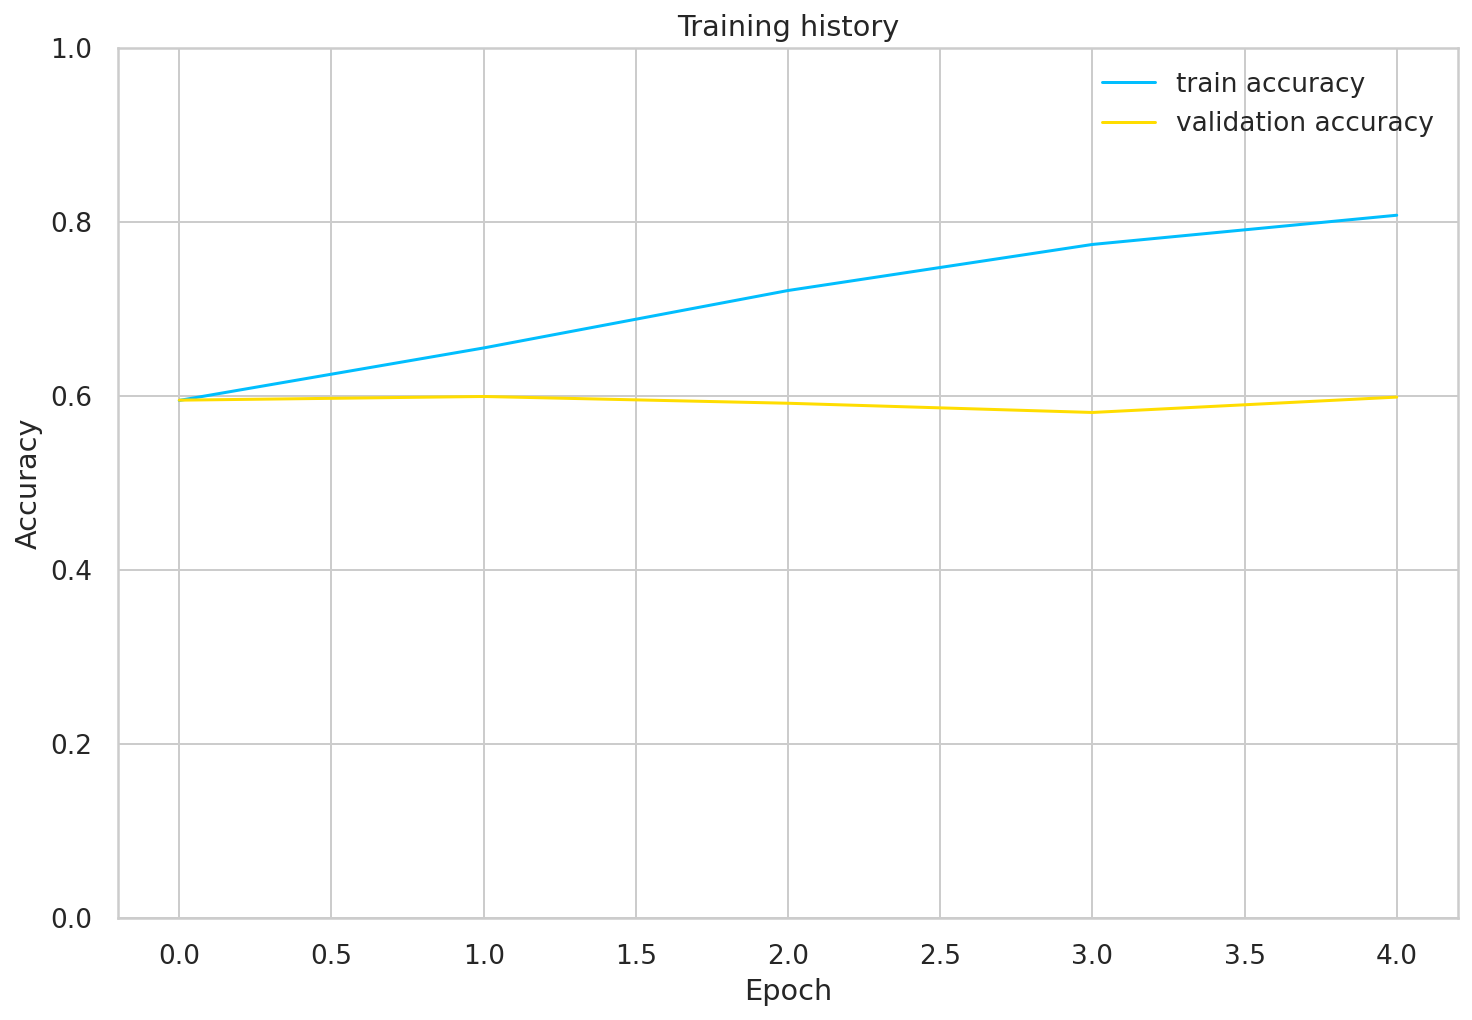

In [ ]:
history_cpu = {'train_acc':[],'val_acc':[]}
for tens in history['train_acc']:
  history_cpu['train_acc'].append(tens.to('cpu'))

for tens in history['val_acc']:
  history_cpu['val_acc'].append(tens.to('cpu'))
  
plt.plot(history_cpu['train_acc'] , label='train accuracy')
plt.plot(history_cpu['val_acc'] , label='validation accuracy')

plt.title('Training history')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend()
plt.ylim([0, 1]);

In [ ]:
model = labelsClassifier(len(class_names))
model.load_state_dict(torch.load('/content/drive/MyDrive/Masters/Deep learning/DL Project/Sentiment Analysis of COVID-19 Vaccination from Twitter/Models/best_model_state.bin'))
model = model.to(device)

Some weights of the model checkpoint at bert-base-cased were not used when initializing BertModel: ['cls.predictions.transform.dense.weight', 'cls.predictions.decoder.weight', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.dense.bias']
- This IS expected if you are initializing BertModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [ ]:
test_acc,test_loss = eval_model(
  model,
  test_data_loader,
  loss_fn,
  device,
  len(df_test)
)

test_acc.item()

0.6173144876325088

In [ ]:
def get_predictions(model, data_loader):
  model = model.eval()
  
  text = []
  predictions = []
  prediction_probs = []
  real_values = []

  with torch.no_grad():
    for d in data_loader:

      texts = d["text"]
      input_ids = d["input_ids"].to(device)
      attention_mask = d["attention_mask"].to(device)
      targets = d["targets"].to(device)

      outputs = model(
        input_ids=input_ids,
        attention_mask=attention_mask
      )
      _, preds = torch.max(outputs, dim=1)

      probs = F.softmax(outputs, dim=1)

      text.extend(texts)
      predictions.extend(preds)
      prediction_probs.extend(probs)
      real_values.extend(targets)

  predictions = torch.stack(predictions).cpu()
  prediction_probs = torch.stack(prediction_probs).cpu()
  real_values = torch.stack(real_values).cpu()
  return text, predictions, prediction_probs, real_values

In [ ]:
y_sentence, y_pred, y_pred_probs, y_test = get_predictions(
  model,
  test_data_loader
)

In [ ]:
print(classification_report(y_test, y_pred, target_names=class_names))

              precision    recall  f1-score   support

     neutral       0.65      0.80      0.72      1602
    positive       0.56      0.44      0.49       711
    negative       0.49      0.28      0.36       517

    accuracy                           0.62      2830
   macro avg       0.57      0.51      0.52      2830
weighted avg       0.60      0.62      0.60      2830



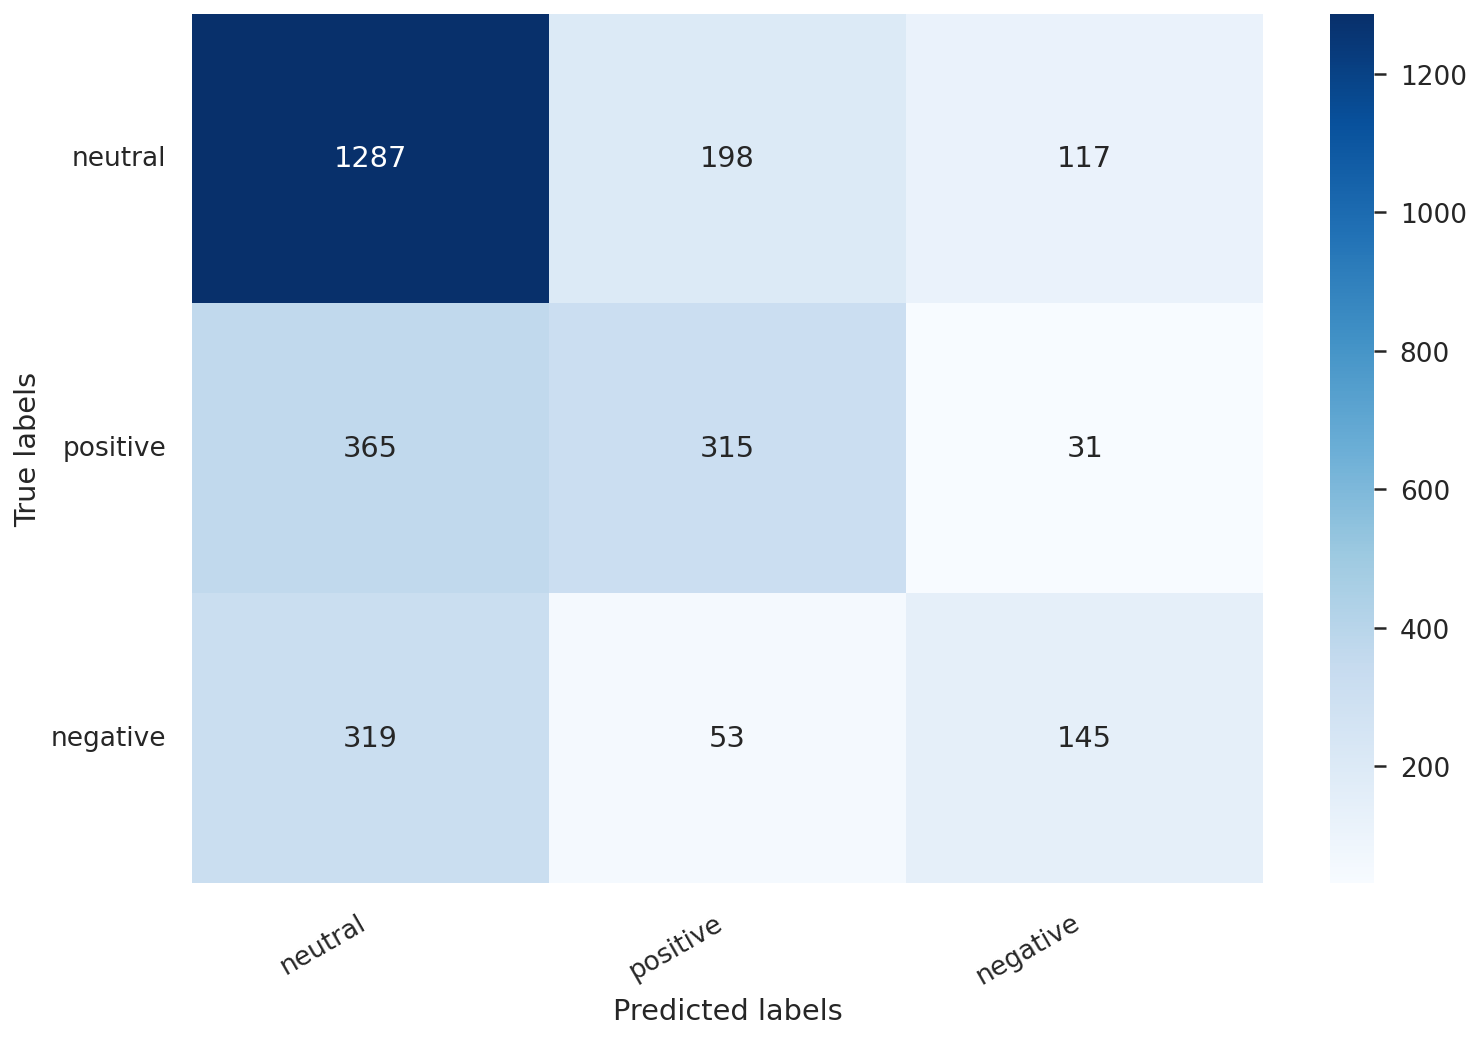

In [ ]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True labels')
  plt.xlabel('Predicted labels');
;
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

# **Single LSTM Model**

In [ ]:
Models_root = "/content/drive/My Drive/Masters/Deep learning/DL Project/Sentiment Analysis of COVID-19 Vaccination from Twitter/Models/"

In [ ]:
import logging
logging.getLogger('tensorflow').disabled = True
model1 = Sequential()
model1.add(layers.Embedding(max_words, 20))
model1.add(layers.LSTM(15,dropout=0.5))
model1.add(layers.Dense(3,activation='softmax'))

model1.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
#Implementing model checkpoins to save the best metric and do not lose it on training.
checkpoint1 = ModelCheckpoint(Models_root+"best_model1.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
history1 = model1.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test),callbacks=[checkpoint1])

Epoch 1/10
1324/1327 [============================>.] - ETA: 0s - loss: 0.9554 - accuracy: 0.5628
Epoch 1: val_accuracy improved from -inf to 0.58118, saving model to /content/drive/My Drive/Masters/Deep learning/DL Project/Sentiment Analysis of COVID-19 Vaccination from Twitter/Models/best_model1.hdf5
1327/1327 [==============================] - 16s 10ms/step - loss: 0.9553 - accuracy: 0.5629 - val_loss: 0.9143 - val_accuracy: 0.5812
Epoch 2/10
1324/1327 [============================>.] - ETA: 0s - loss: 0.9139 - accuracy: 0.5824
Epoch 2: val_accuracy improved from 0.58118 to 0.59044, saving model to /content/drive/My Drive/Masters/Deep learning/DL Project/Sentiment Analysis of COVID-19 Vaccination from Twitter/Models/best_model1.hdf5
1327/1327 [==============================] - 12s 9ms/step - loss: 0.9140 - accuracy: 0.5823 - val_loss: 0.9155 - val_accuracy: 0.5904
Epoch 3/10
1321/1327 [============================>.] - ETA: 0s - loss: 0.9033 - accuracy: 0.5914
Epoch 3: val_accuracy 

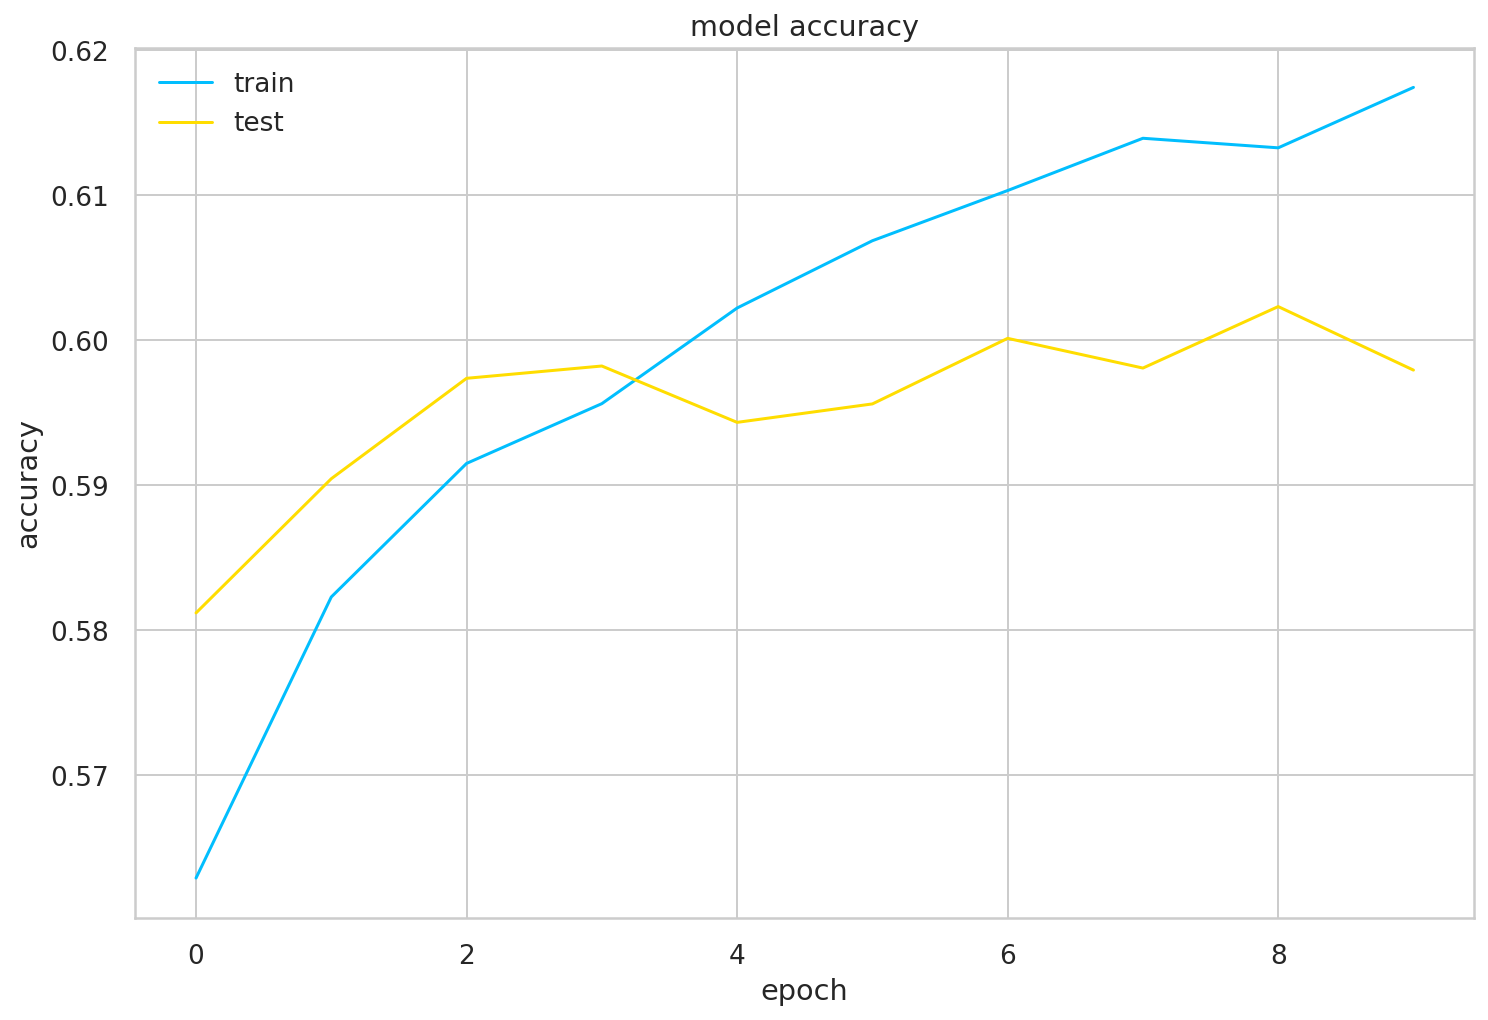

In [ ]:
# summarize history for accuracy
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

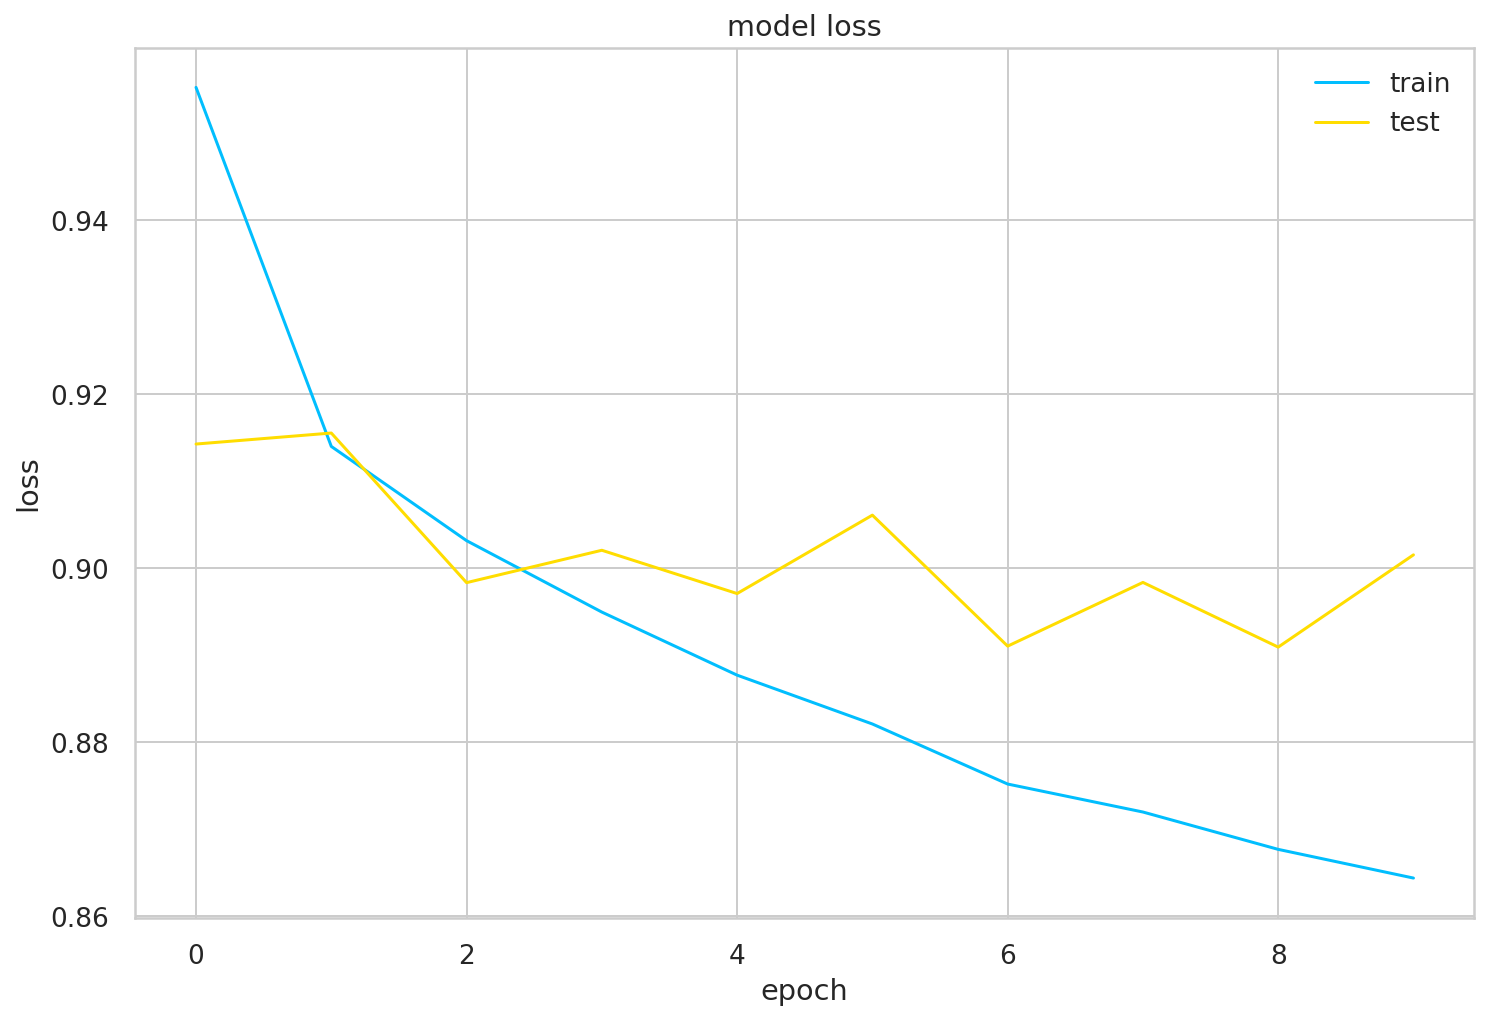

In [ ]:
# summarize history for accuracy
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
best_model = keras.models.load_model(Models_root+"best_model1.hdf5")

In [ ]:
lstmpredict = model1.predict(X_test)
print(lstmpredict)

443/443 [==============================] - 2s 3ms/step
[[0.7268832  0.11285657 0.16026035]
 [0.3034971  0.6407446  0.0557583 ]
 [0.6462381  0.15605862 0.19770324]
 ...
 [0.56897265 0.32579446 0.10523294]
 [0.79748654 0.10228745 0.10022596]
 [0.7938247  0.14102615 0.06514917]]


In [ ]:
lstmpredict.shape

(14147, 3)

In [ ]:
X_test.shape

(14147, 200)

In [ ]:
test_loss, test_acc = best_model.evaluate(X_test, y_test, verbose=2)
print('Model accuracy: ',test_acc)

443/443 - 2s - loss: 0.8909 - accuracy: 0.6023 - 2s/epoch - 5ms/step
Model accuracy:  0.602318525314331


In [ ]:
test_loss, test_acc = best_model.evaluate(lstmpredict,y_test, verbose=2)
print('Model accuracy: ',test_acc)

443/443 - 1s - loss: 1.0251 - accuracy: 0.5577 - 1s/epoch - 3ms/step
Model accuracy:  0.5577154159545898


In [ ]:
# Plot the classification_report 
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1),np.argmax(lstmpredict, axis=1)))

              precision    recall  f1-score   support

           0       0.61      0.90      0.72      7890
           1       0.58      0.29      0.39      3731
           2       0.48      0.11      0.18      2526

    accuracy                           0.60     14147
   macro avg       0.56      0.43      0.43     14147
weighted avg       0.58      0.60      0.54     14147



# **Bidirectional LSTM Model**

In [ ]:
model = Sequential()
model.add(layers.Embedding(max_words, 40, input_length=max_len))
model.add(layers.Bidirectional(layers.LSTM(20,dropout=0.6)))
model.add(layers.Dense(3,activation='softmax'))

# Compile the model
model.compile(optimizer='rmsprop',loss='categorical_crossentropy', metrics=['accuracy'])
# Save the Modek
checkpoint2 = ModelCheckpoint(Models_root+"best_model2.hdf5", monitor='val_accuracy', verbose=1,save_best_only=True, mode='auto', period=1,save_weights_only=False)
# Train the Model
history = model.fit(X_train, y_train, epochs=10,validation_data=(X_test, y_test),callbacks=[checkpoint2])

Epoch 1/10
1325/1327 [============================>.] - ETA: 0s - loss: 0.9488 - accuracy: 0.5668
Epoch 1: val_accuracy improved from -inf to 0.58062, saving model to /content/drive/My Drive/Masters/Deep learning/DL Project/Sentiment Analysis of COVID-19 Vaccination from Twitter/Models/best_model2.hdf5
1327/1327 [==============================] - 24s 15ms/step - loss: 0.9488 - accuracy: 0.5668 - val_loss: 0.9173 - val_accuracy: 0.5806
Epoch 2/10
1325/1327 [============================>.] - ETA: 0s - loss: 0.9127 - accuracy: 0.5850
Epoch 2: val_accuracy improved from 0.58062 to 0.59341, saving model to /content/drive/My Drive/Masters/Deep learning/DL Project/Sentiment Analysis of COVID-19 Vaccination from Twitter/Models/best_model2.hdf5
1327/1327 [==============================] - 19s 15ms/step - loss: 0.9127 - accuracy: 0.5849 - val_loss: 0.9011 - val_accuracy: 0.5934
Epoch 3/10
1326/1327 [============================>.] - ETA: 0s - loss: 0.8996 - accuracy: 0.5924
Epoch 3: val_accuracy

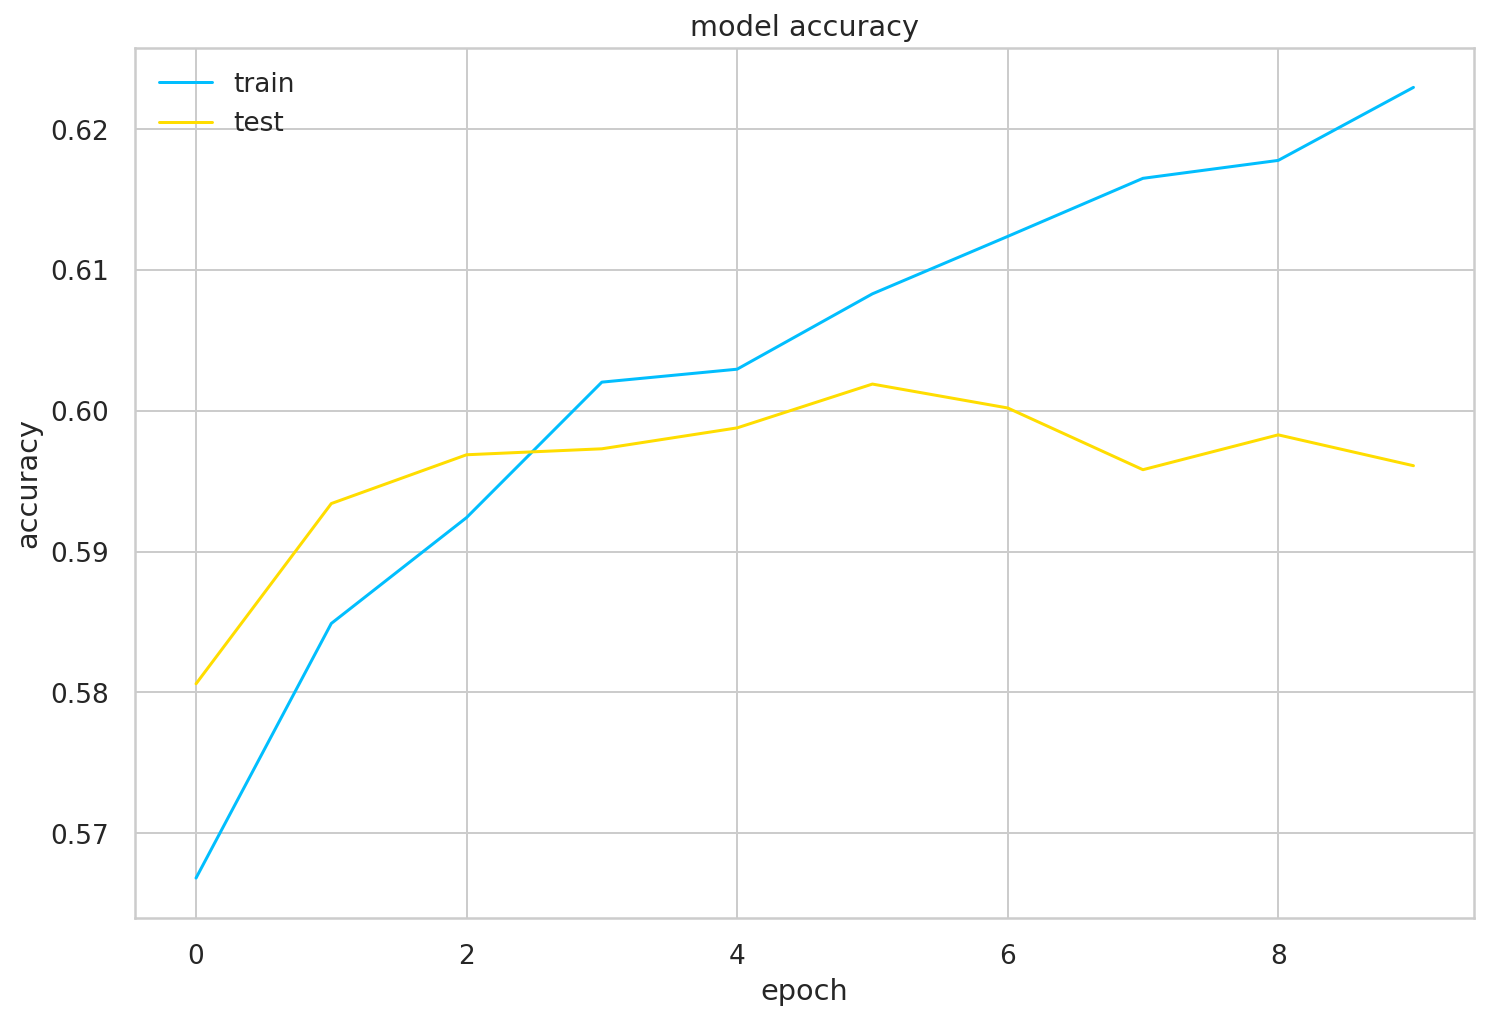

In [ ]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

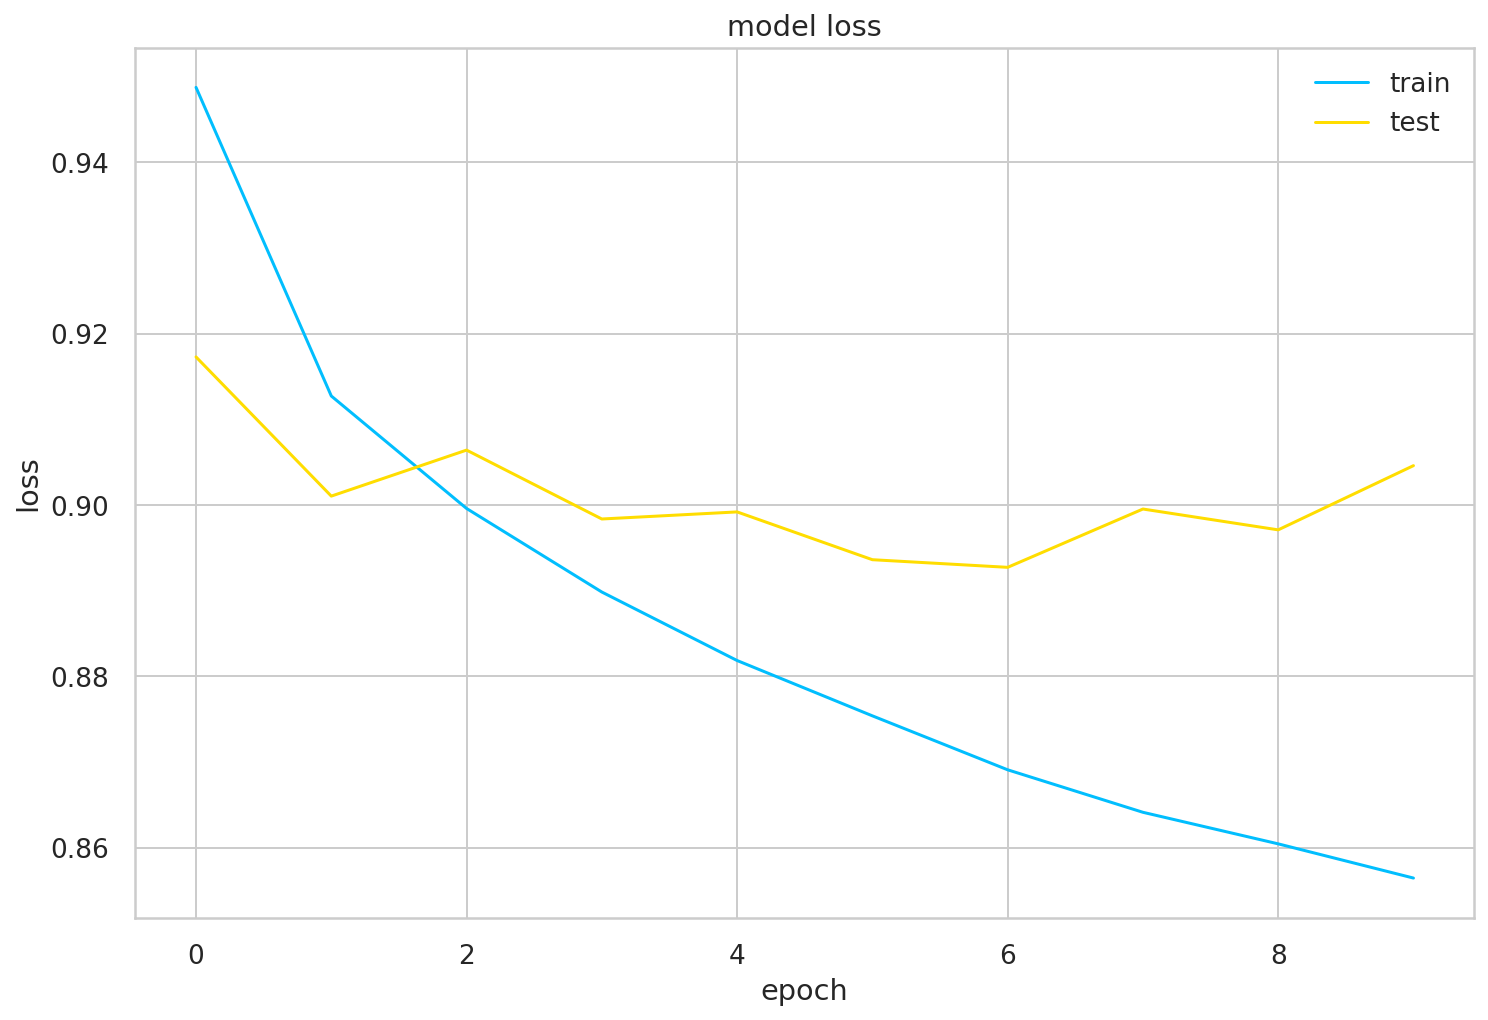

In [ ]:
# summarize history for accuracy
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper right')
plt.show()

In [ ]:
best_model = keras.models.load_model(Models_root+"best_model2.hdf5")

In [ ]:
secpredictions = best_model.predict(X_test)
print(secpredictions)

443/443 [==============================] - 3s 5ms/step
[[0.68355876 0.11901094 0.1974303 ]
 [0.304626   0.6412971  0.05407687]
 [0.57198644 0.2204373  0.20757629]
 ...
 [0.51278293 0.34735146 0.13986556]
 [0.7367071  0.12369994 0.13959302]
 [0.75775576 0.15463266 0.08761159]]


In [ ]:
secpredictions.shape

(14147, 3)

In [ ]:
y_test.shape

(14147, 3)

In [ ]:
test_loss2, test_acc2 = best_model.evaluate(X_test, y_test, verbose=2)
print('Model accuracy: ',test_acc2)

443/443 - 3s - loss: 0.8936 - accuracy: 0.6019 - 3s/epoch - 7ms/step
Model accuracy:  0.6018943786621094


In [ ]:
test_loss1, test_acc1 = best_model.evaluate(secpredictions,y_test, verbose=2)
print('Model accuracy: ',test_acc1)

ValueError: ignored

In [ ]:
# Plot the classification_report 
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1),np.argmax(secpredictions, axis=1)))

**Confusion Matrix**

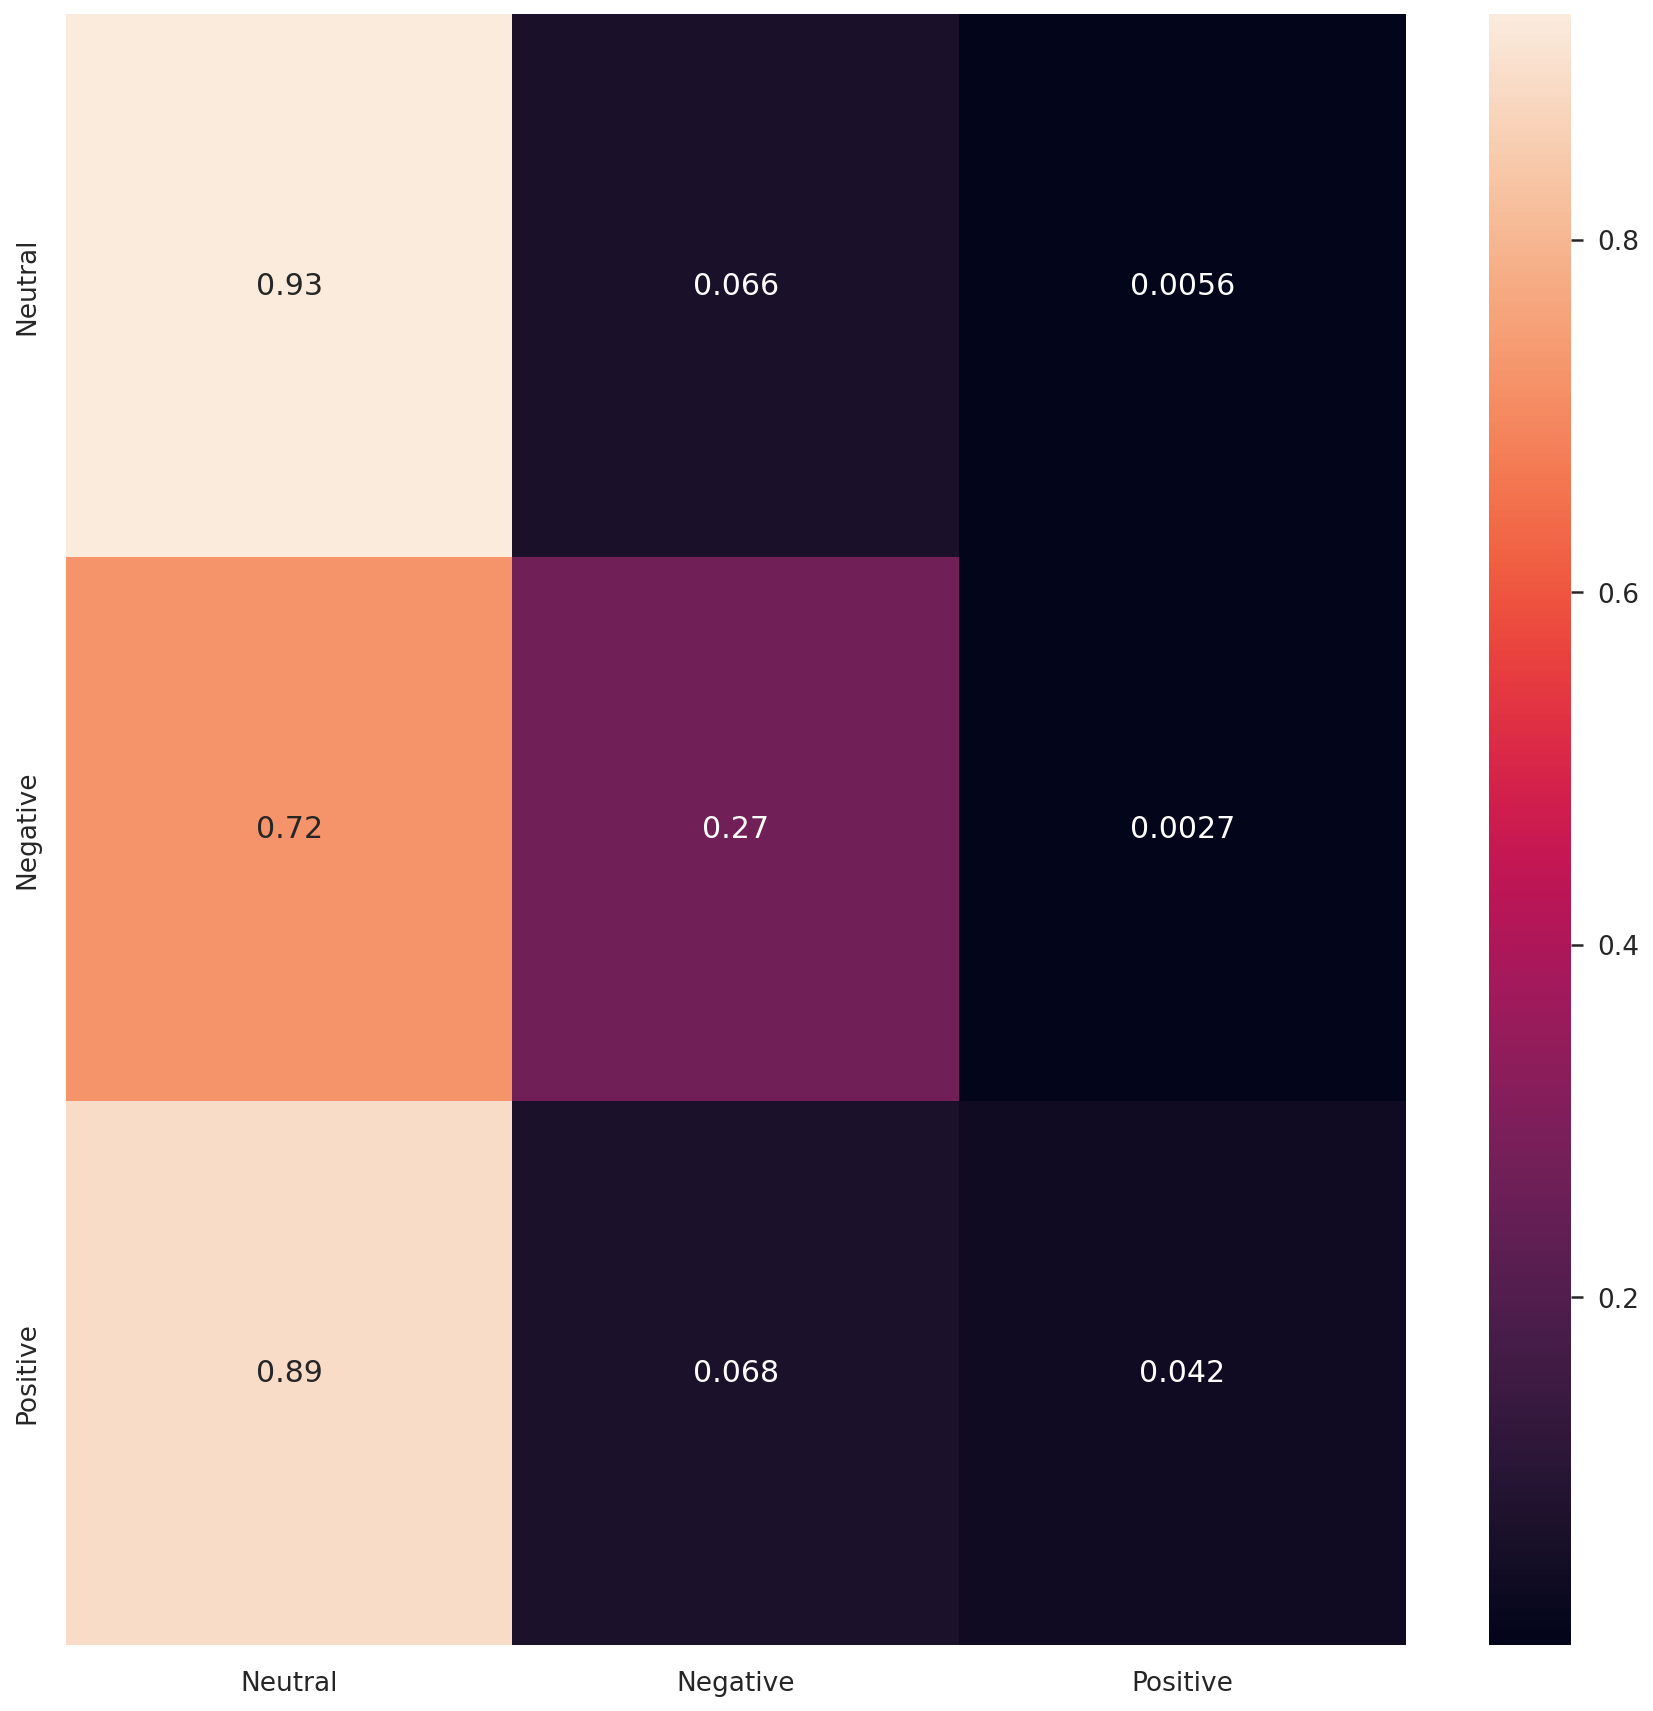

In [ ]:
matrix = confusion_matrix(y_test.argmax(axis=1), np.around(secpredictions, decimals=0).argmax(axis=1))
conf_matrix = pd.DataFrame(matrix, index = ['Neutral','Negative','Positive'],columns = ['Neutral','Negative','Positive'])

#Normalizing
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (15,15))
seaborn.heatmap(conf_matrix, annot=True, annot_kws={"size": 15})

In [ ]:
sentiment = ['Neutral','Negative','Positive']

In [ ]:
sequence = tokenizer.texts_to_sequences(['the trump administration failed to deliver on vaccine promises shocker covidiots coronavirus covidvaccine'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(best_model.predict(test), decimals=0).argmax(axis=1)[0]]

AttributeError: ignored

In [ ]:
sequence = tokenizer.texts_to_sequences(['this data science article is the best ever'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(best_model.predict(test), decimals=0).argmax(axis=1)[0]]

In [ ]:
sequence = tokenizer.texts_to_sequences(['Facts are immutable Senator even when youre not ethically sturdy enough to acknowledge them.'])
test = pad_sequences(sequence, maxlen=max_len)
sentiment[np.around(best_model.predict(test), decimals=0).argmax(axis=1)[0]]

# **Vaccine Visualization**

In [ ]:
# Convert dates
tweets_df['date'] = pd.to_datetime(tweets_df['date'], errors='coerce').dt.date

# Get counts of number of tweets by sentiment for each date
timeline = tweets_df.groupby(['date', 'sentiment']).agg(**{'tweets': ('id', 'count')}).reset_index().dropna()

fig = px.line(timeline, x='date', y='tweets', color='sentiment', color_discrete_sequence=["#EF553B", "#636EFA", "#00CC96"], category_orders={'sentiment': ['neutral', 'negative', 'positive']},
             title='Timeline showing sentiment of tweets about COVID-19 vaccines')
fig.show()

In [ ]:
show_wordcloud(tweets_df.loc[tweets_df['sentiment']=='Positive', 'text'], title = 'Prevalent words in tweets (Positive sentiment)')

In [ ]:
show_wordcloud(tweets_df.loc[tweets_df['sentiment']=='Neutral', 'text'], title = 'Prevalent words in tweets (Neutral sentiment)')

In [ ]:
show_wordcloud(tweets_df.loc[tweets_df['sentiment']=='Negative', 'text'], title = 'Prevalent words in tweets (Negative sentiment)')

# **Models Results**

### **BERT**

In [ ]:
print(classification_report(y_test, y_pred, target_names=class_names))

ValueError: ignored

In [ ]:
def show_confusion_matrix(confusion_matrix):
  hmap = sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues")
  hmap.yaxis.set_ticklabels(hmap.yaxis.get_ticklabels(), rotation=0, ha='right')
  hmap.xaxis.set_ticklabels(hmap.xaxis.get_ticklabels(), rotation=30, ha='right')
  plt.ylabel('True labels')
  plt.xlabel('Predicted labels');
;
cm = confusion_matrix(y_test, y_pred)
df_cm = pd.DataFrame(cm, index=class_names, columns=class_names)
show_confusion_matrix(df_cm)

### **LSTM**

In [ ]:
# Plot the classification_report 
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1),np.argmax(lstmpredict, axis=1)))

              precision    recall  f1-score   support

           0       0.61      0.90      0.72      7890
           1       0.58      0.29      0.39      3731
           2       0.48      0.11      0.18      2526

    accuracy                           0.60     14147
   macro avg       0.56      0.43      0.43     14147
weighted avg       0.58      0.60      0.54     14147



### **BI-LSTM**

In [ ]:
# Plot the classification_report 
from sklearn.metrics import classification_report
print(classification_report(np.argmax(y_test, axis=1),np.argmax(secpredictions, axis=1)))

              precision    recall  f1-score   support

           0       0.61      0.89      0.72      7890
           1       0.56      0.37      0.44      3731
           2       0.56      0.06      0.10      2526

    accuracy                           0.60     14147
   macro avg       0.58      0.44      0.42     14147
weighted avg       0.59      0.60      0.54     14147



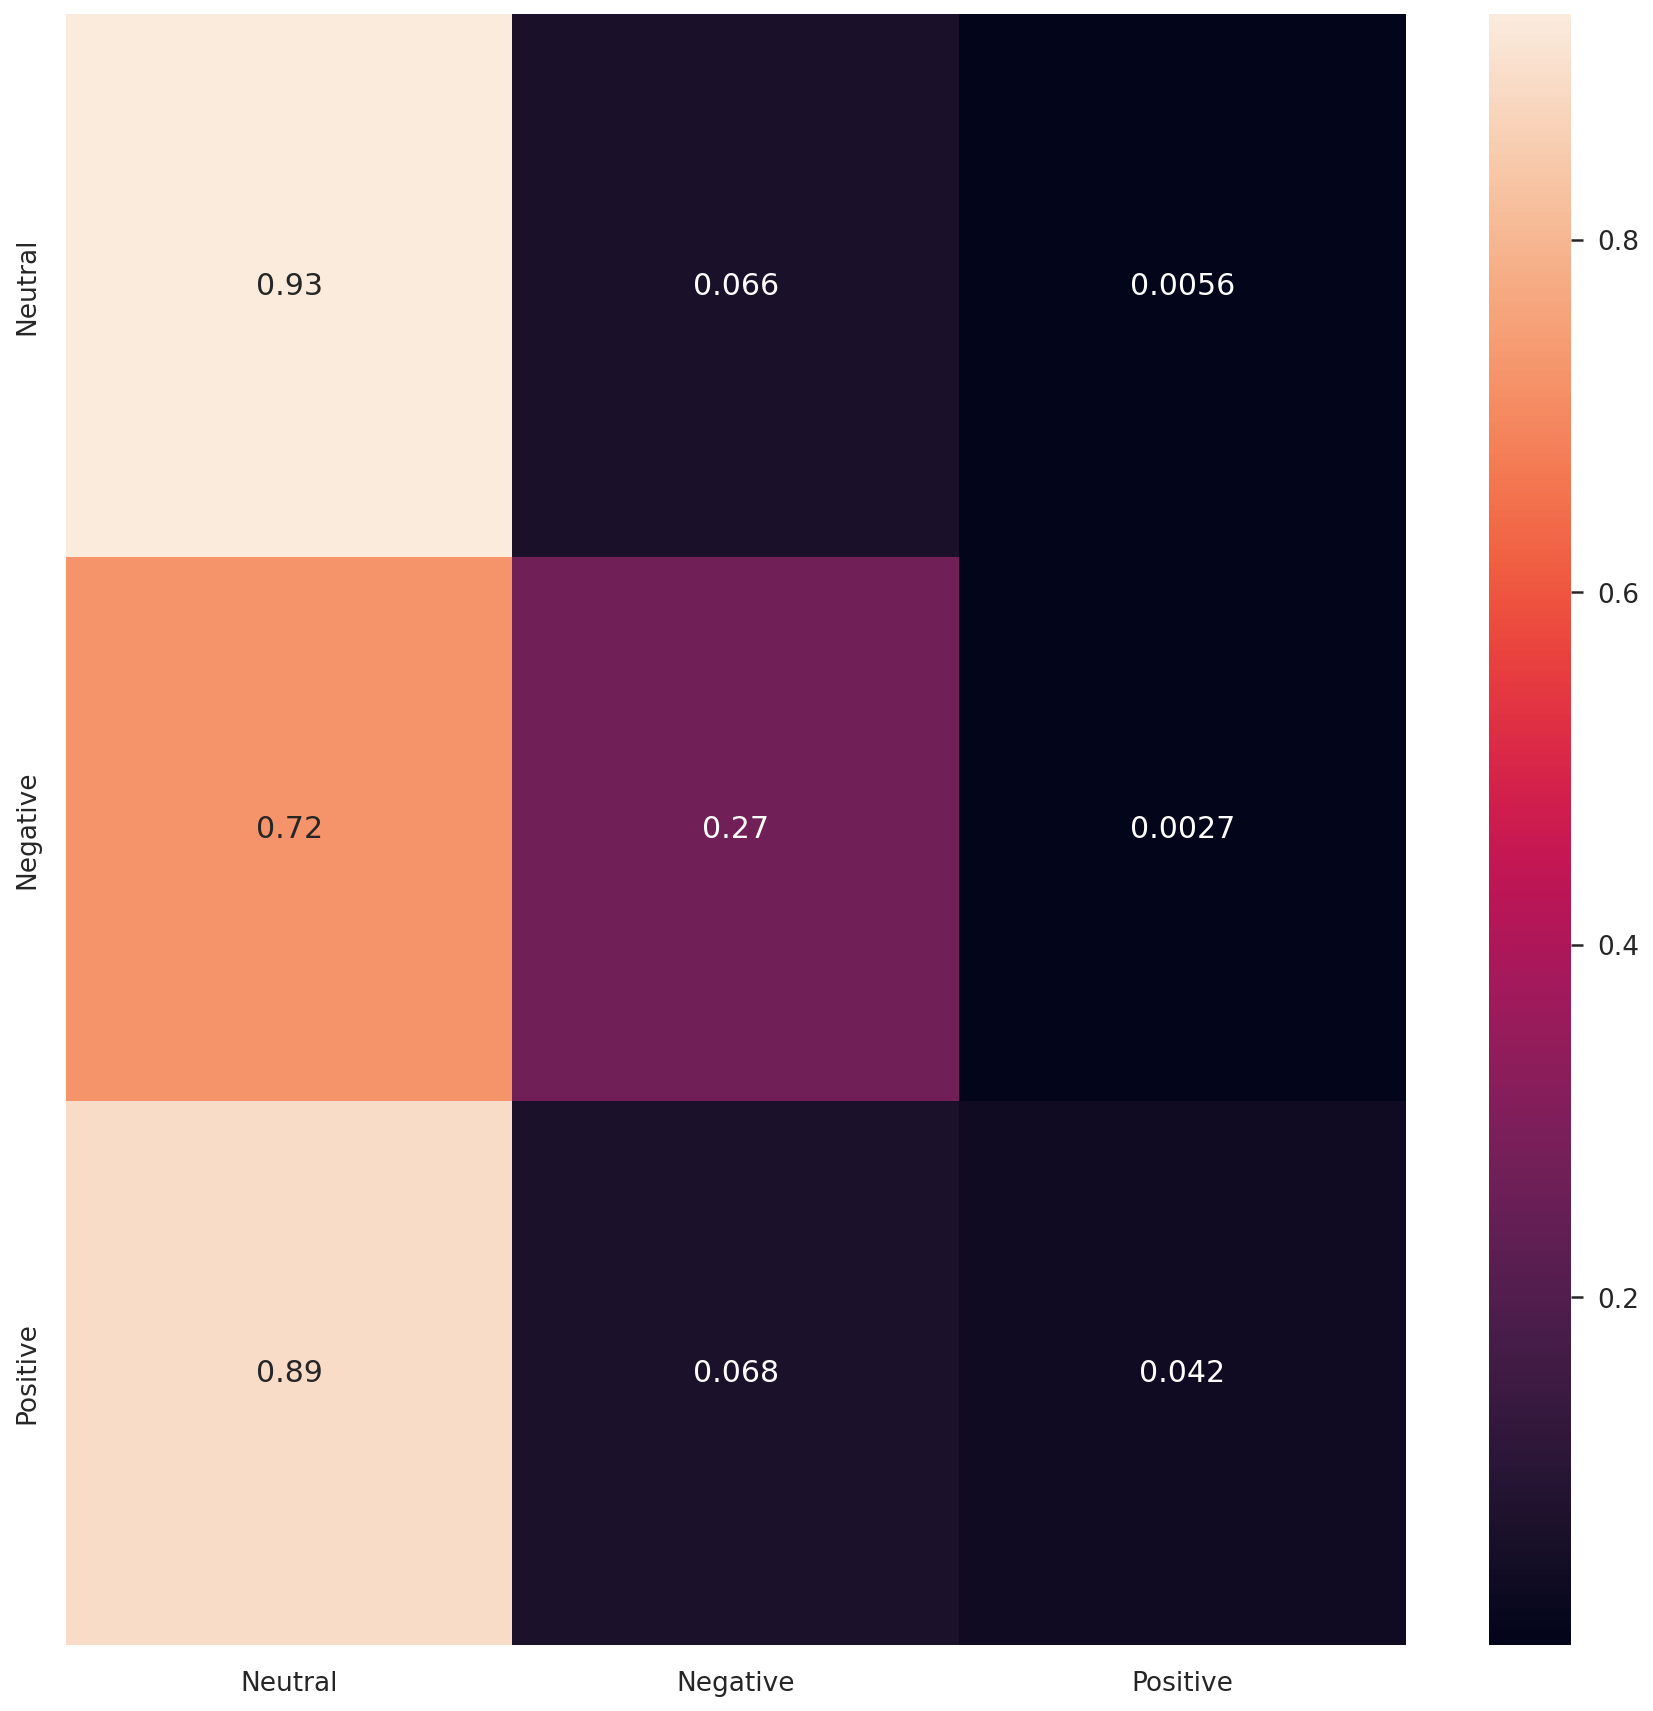

In [ ]:
matrix = confusion_matrix(y_test.argmax(axis=1), np.around(secpredictions, decimals=0).argmax(axis=1))
conf_matrix = pd.DataFrame(matrix, index = ['Neutral','Negative','Positive'],columns = ['Neutral','Negative','Positive'])

#Normalizing
conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis]
plt.figure(figsize = (15,15))
seaborn.heatmap(conf_matrix, annot=True, annot_kws={"size": 15})